In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Diwali Sales Data.csv",encoding = 'unicode_escape')

In [3]:
# to find shape of dataset
df.shape

(11251, 15)

In [4]:
# to retieve first 5 rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# to view information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
# drop unrelated/blank columns
df.drop(['Status','unnamed1'],axis=1,inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [6]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [7]:
df['Amount'] = df['Amount'].astype('int')

In [8]:
df['Amount'].dtypes

dtype('int32')

In [9]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [10]:
df.rename(columns={'Marital_Status':'Shaadi'},inplace = True)

In [11]:
df.describe()

,User_ID,Age,Shaadi,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [11]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender

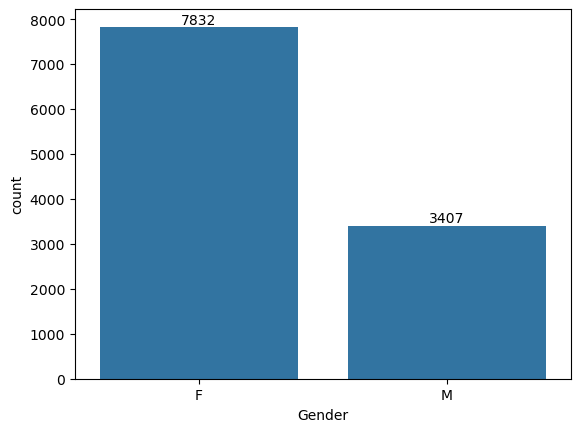

In [16]:
# Plotting a bar chart showing the number of buyers grouped by gender
ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

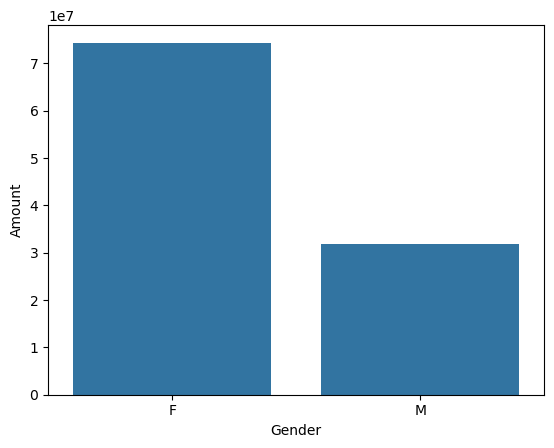

In [12]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x='Gender',y = 'Amount',data = sales_gen)

# Age

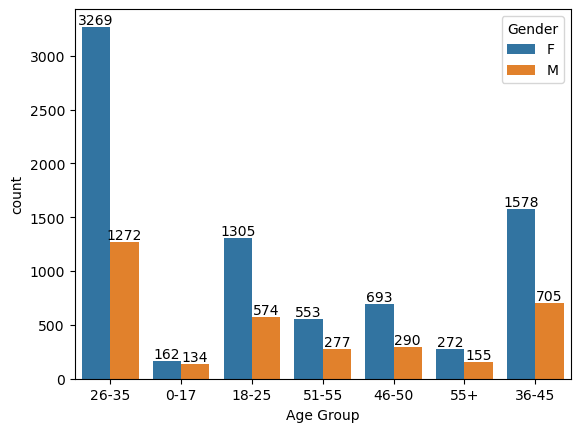

In [13]:
# Plotting a bar chart showing the number of buyers grouped by Age Group
ax = sns.countplot(x = 'Age Group',data = df,hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

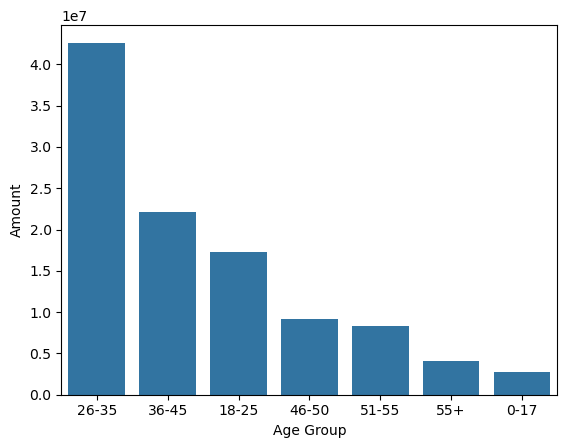

In [14]:
# plotting a bar chart for age group vs total amount
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x='Age Group',y = 'Amount',data = sales_age)

# From above graph we can see that most of the buyers are of the age group between 26 to 35 years female

# State

<Axes: xlabel='State', ylabel='Orders'>

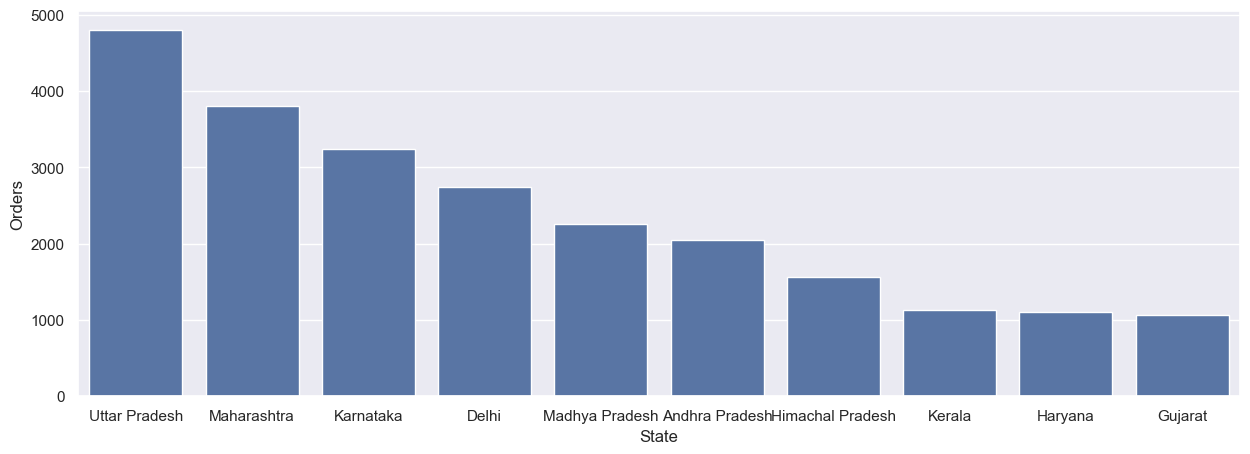

In [15]:
# Total numbers of orders from top 10 cities
sales_state = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y = 'Orders',data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

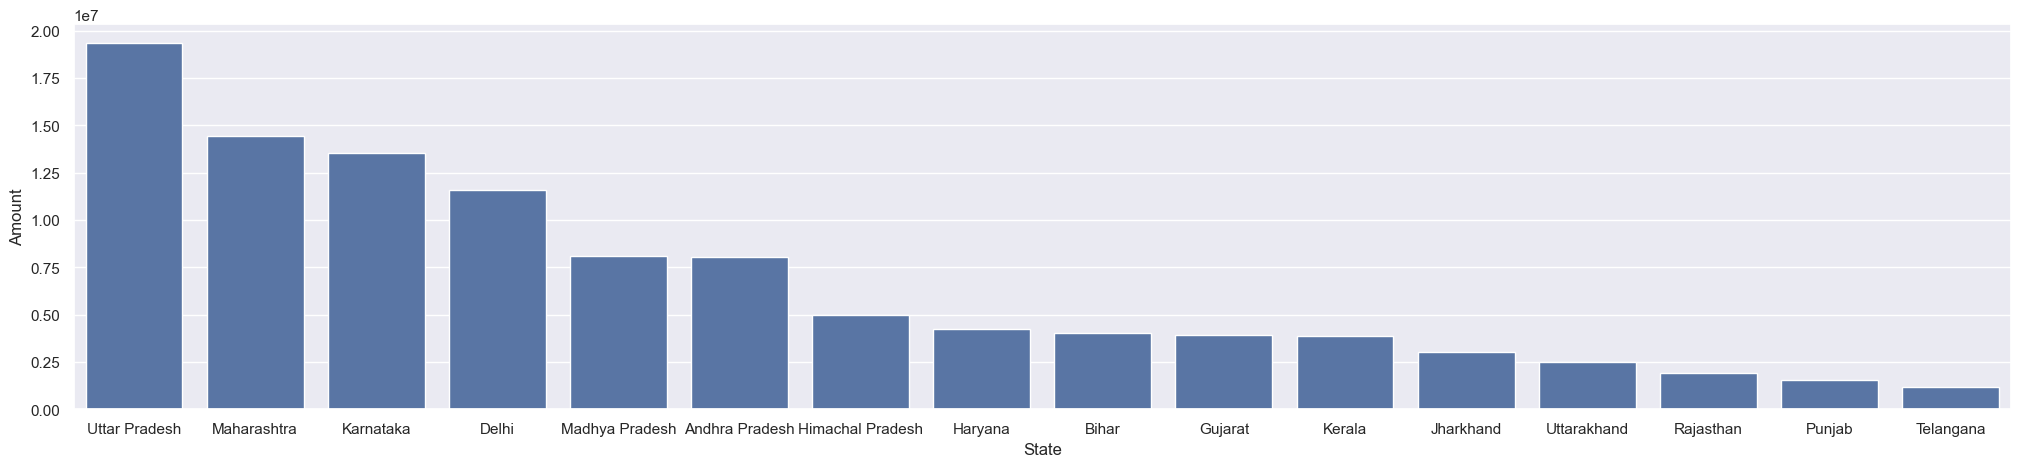

In [16]:
# Total amount of sales in top 10 cities
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State',y = 'Amount',data = sales_state)

# From the above graph we can see that most of the orders and total sales amount are from Uttar Pradesh, Karnataka respectively

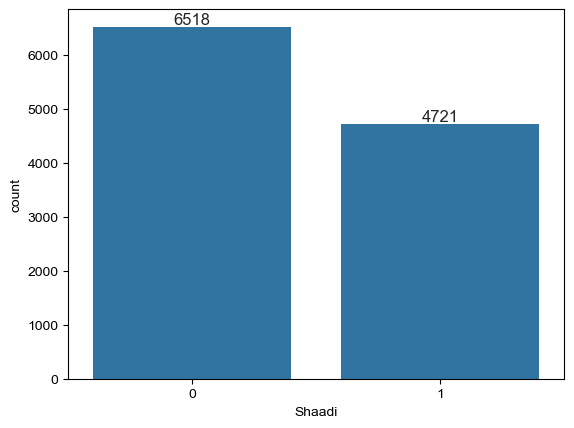

In [18]:
# Plotting a bar chart showing the number of buyers grouped by Marital Status
ax = sns.countplot(x = 'Shaadi',data = df)
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Shaadi', ylabel='Amount'>

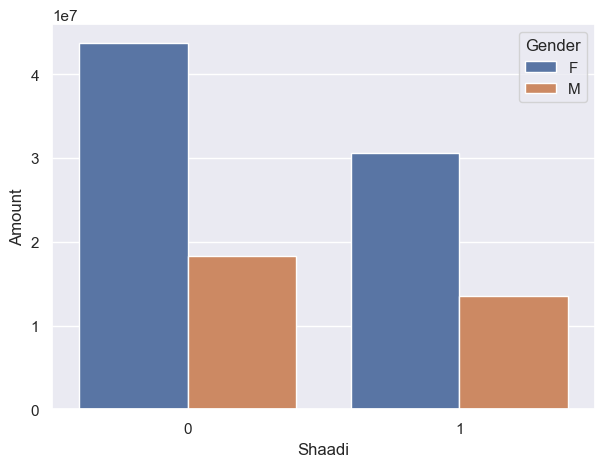

In [21]:
# plotting a bar chart for Shaadi vs total amount
sales_shaadi = df.groupby(['Shaadi','Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Shaadi',y = 'Amount',data = sales_shaadi,hue = 'Gender')

## From the above graph most of the buyers are unmarried (Womens) have high purchasing power

# Occupation

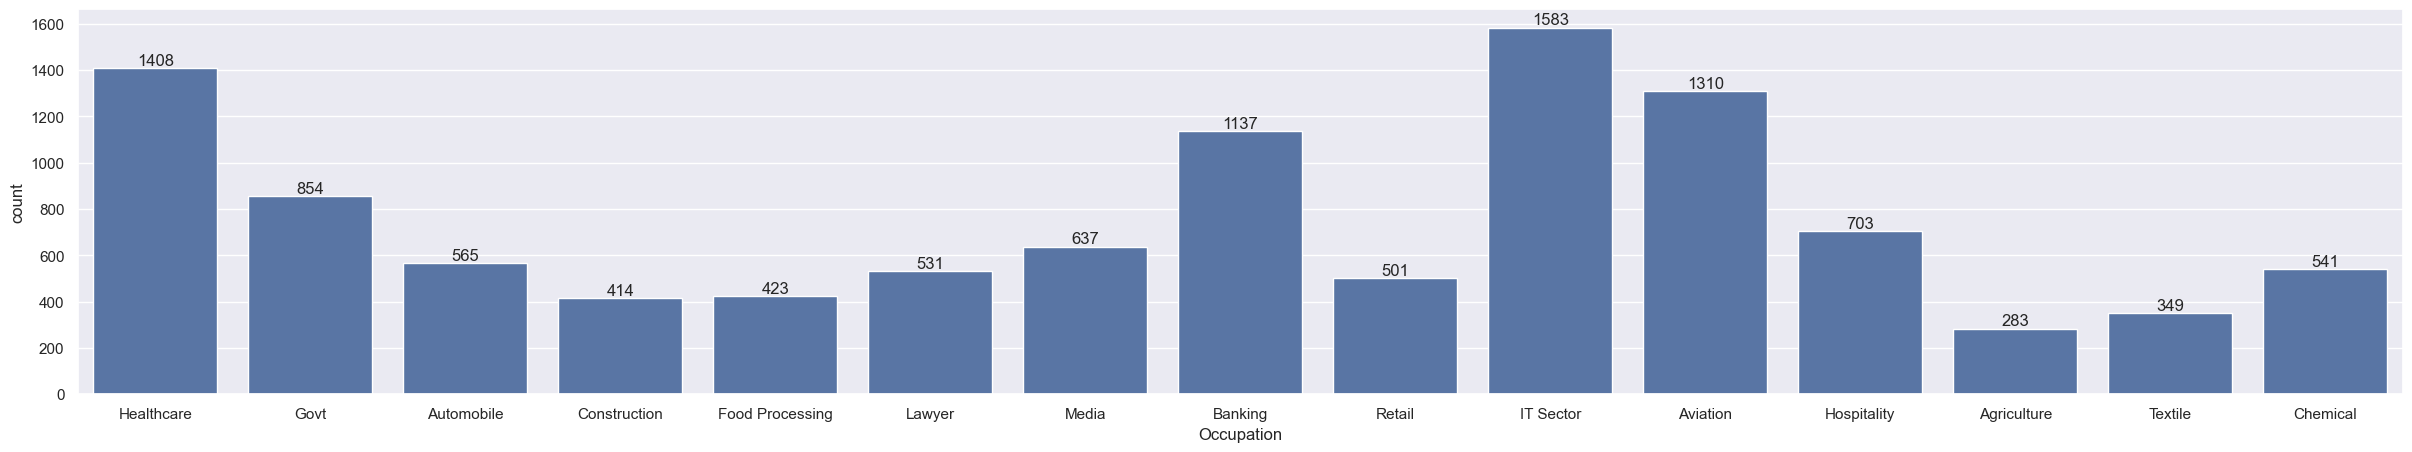

In [23]:
# Plotting a bar chart showing the number of buyers grouped by Occupation
ax = sns.countplot(x = 'Occupation',data = df)
sns.set(rc={'figure.figsize':(30,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

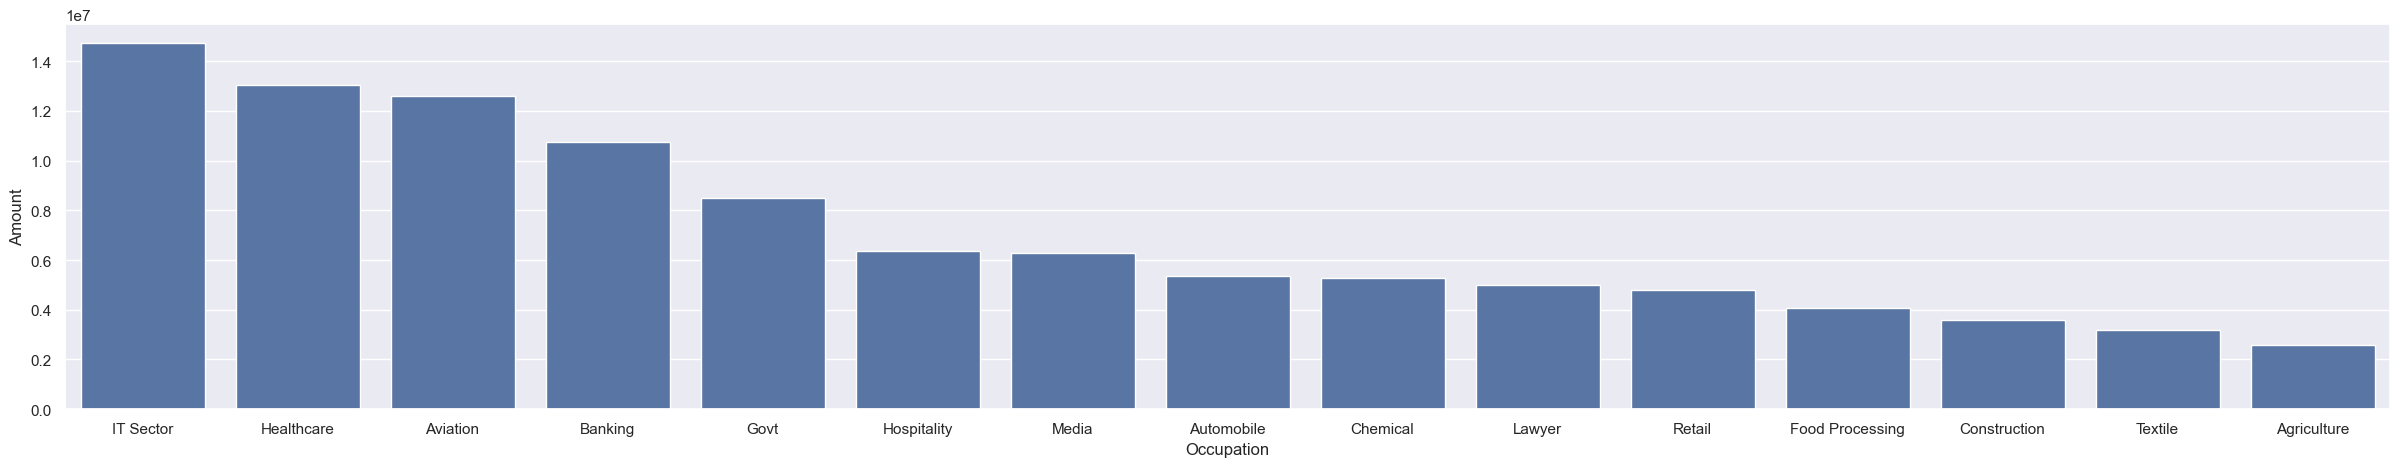

In [19]:
# plotting a bar chart for occupation vs total amount
sales_occupation = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(x='Occupation',y = 'Amount',data = sales_occupation)

## From the above graph we can see that most of the buyers are working in IT, Healthcare and Aviation sector

# Product Category

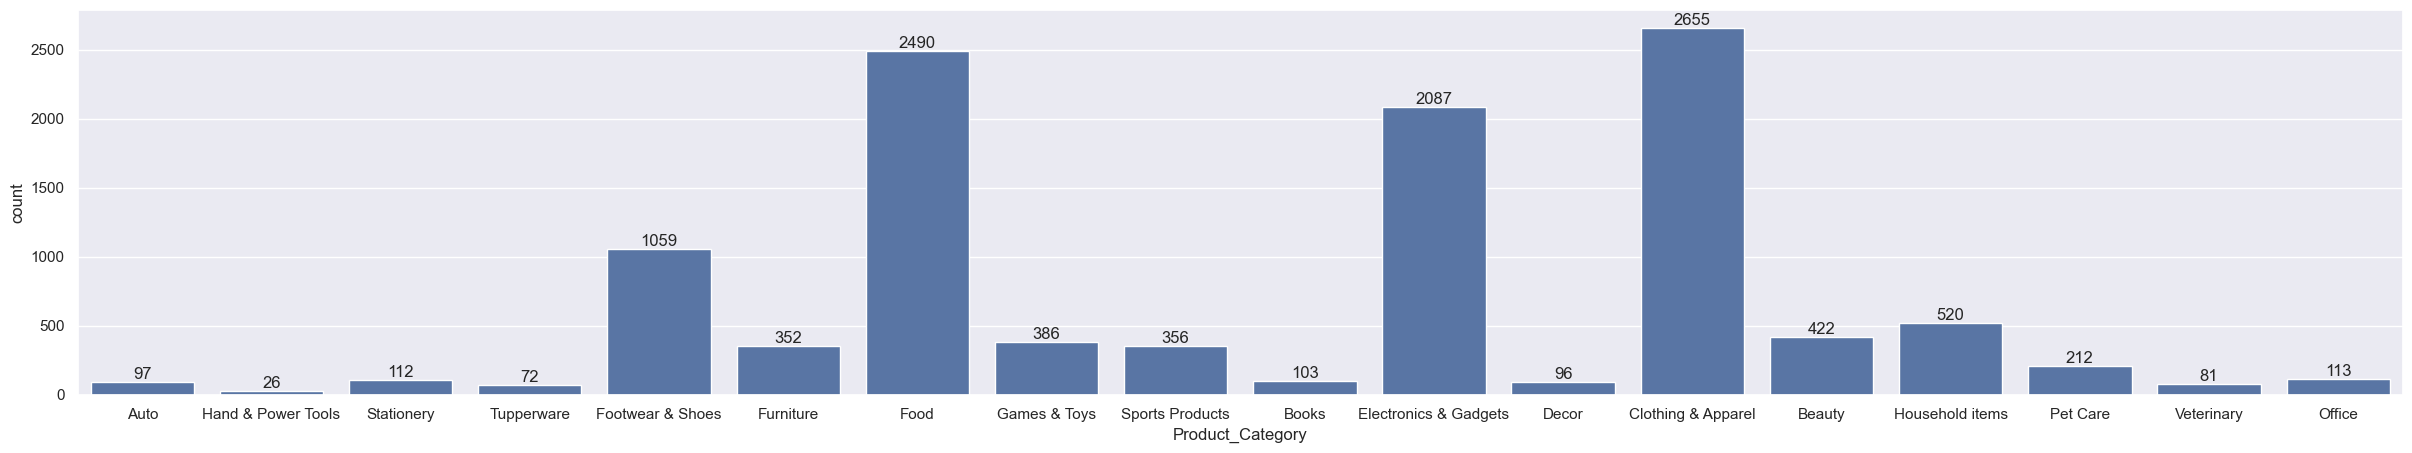

In [24]:
# Plotting a bar chart showing the number of buyers grouped by Product Category
ax = sns.countplot(x = 'Product_Category',data = df)
sns.set(rc={'figure.figsize':(30,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

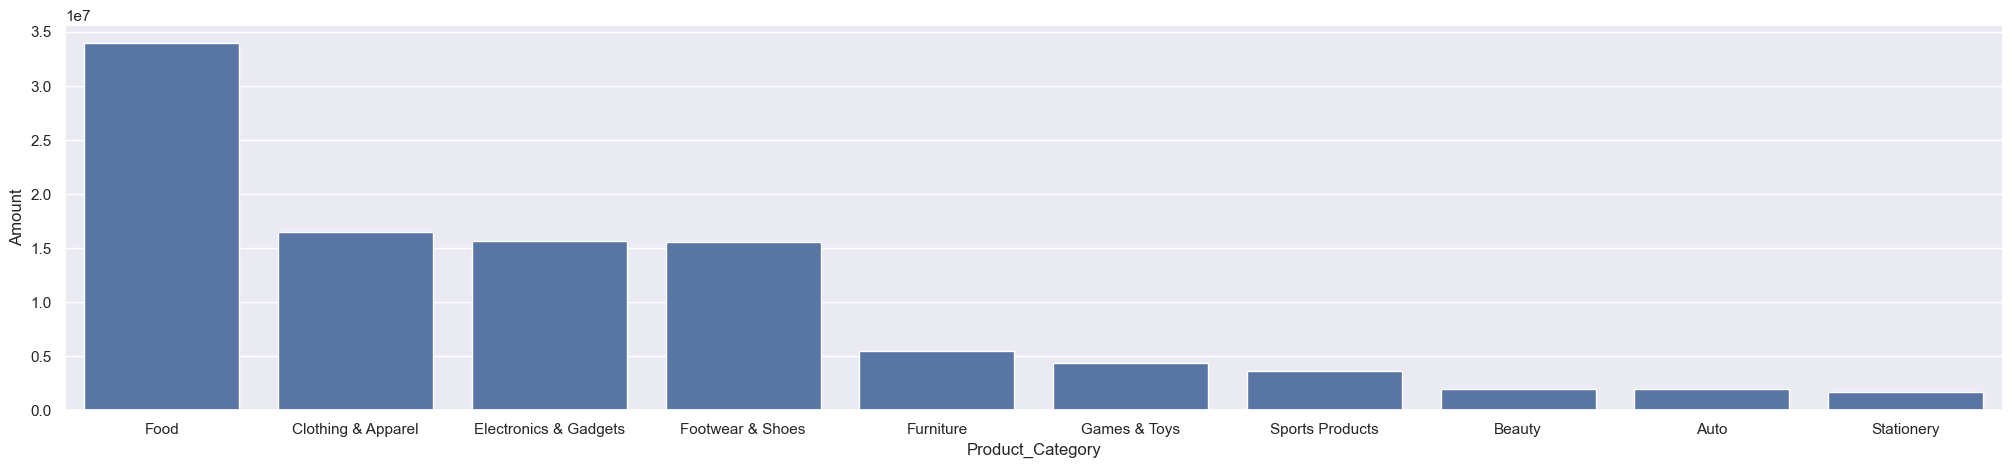

In [26]:
# plotting a bar chart for Product Category vs total amount
sales_product = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='Product_Category',y = 'Amount',data = sales_product)

## From the above graph we can see that most of the sold products are from Food,Clothing and Electronic Category

<Axes: xlabel='Product_ID', ylabel='Amount'>

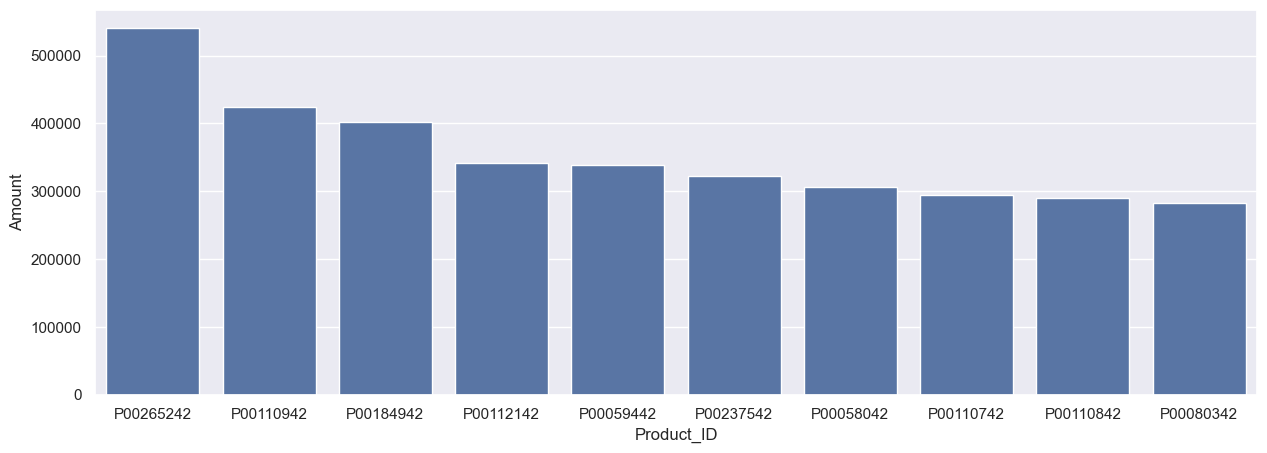

In [27]:
sales_productid = df.groupby(['Product_ID'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Product_ID',y = 'Amount',data = sales_productid)

## From the above graph we can see Product ID - P00265242 was the most purchased product

<Axes: xlabel='Product_ID', ylabel='Amount'>

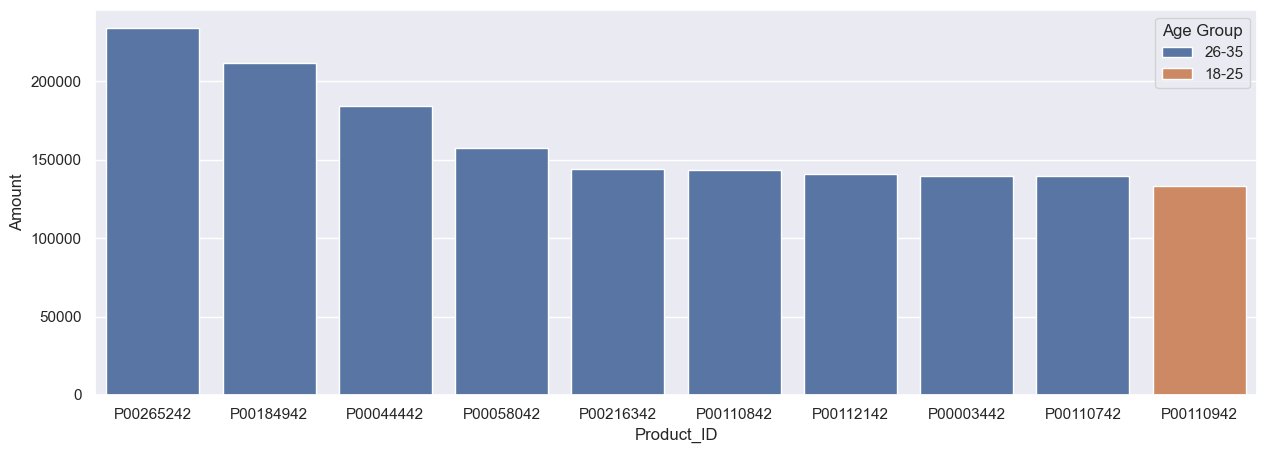

In [29]:
sales_productid = df.groupby(['Product_ID','Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Product_ID',y = 'Amount',data = sales_productid,hue = 'Age Group')

## From the above graph we can see Product ID - P00265242 was the top selling product and Age Group 26-35 are the primary buyers but Age Group 18 - 25 prefers Product ID - P00110942 which shows different prefernce in their segment  

# Conclusion

## Married Woman age group 26 to 35 years from UP, Maharastra and Karnataka working in IT, Health Care and Aviation are more likely to buy products from Food, Clothing and Electronics Category